In [1]:
#task1:
import numpy as np
from PIL import Image
from scipy.stats import pearsonr

# load the dataset
data = np.loadtxt('iris.TXT' , skiprows=3)
# extract the features
X = data[:, 0:]

def CorrelationMatrix(X):
    corr_matrix = np.zeros((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            corr_matrix[i][j], _ = pearsonr(X[i], X[j])
    print("\nCorrelation matrix : \n\n",corr_matrix)
    median_vals = np.median(corr_matrix, axis=0)
    discretized_matrix = np.where(corr_matrix > median_vals, 1, 0)
    
    print("\nDiscretized matrix: \n\n",discretized_matrix)
    return discretized_matrix

discretized_matrix=CorrelationMatrix(X)


Correlation matrix : 

 [[1.         0.99599866 0.99997391 ... 0.65347343 0.6339168  0.63315839]
 [0.99599866 1.         0.99660709 ... 0.70898277 0.68625679 0.68483481]
 [0.99997391 0.99660709 1.         ... 0.65755616 0.63763128 0.6368058 ]
 ...
 [0.65347343 0.70898277 0.65755616 ... 1.         0.99570813 0.99446012]
 [0.6339168  0.68625679 0.63763128 ... 0.99570813 1.         0.99991588]
 [0.63315839 0.68483481 0.6368058  ... 0.99446012 0.99991588 1.        ]]

Discretized matrix: 

 [[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [2]:
def bitmapGeneration(matrix):
    bitmap = np.uint8(matrix * 255) 
    bitmap_image = Image.fromarray(bitmap, mode='L') 
    
    zoom_factor = 2 
    resized_image = bitmap_image.resize((bitmap.shape[1]*zoom_factor, bitmap.shape[0]*zoom_factor))
    resized_image.show()
    return resized_image.size

            
image_size=bitmapGeneration(discretized_matrix)
# Creating the color-coded image
def coloredImageGeneration(input_matrix):
    zoom_factor = 2 
    colored_image = Image.new(mode='RGB', size=image_size, color=(0,255,0)) 
    max_values = np.max(input_matrix, axis=0) 
    for i in range(input_matrix.shape[1]): # For each column
        column_values = input_matrix[:,i] # Get the column values
        scaled_values = (column_values / max_values[i]) * 255
        for j in range(input_matrix.shape[0]): # For each row in the column
            pixel_value = int(scaled_values[j]) # Get the pixel value
            colored_image.putpixel((i*zoom_factor, j*zoom_factor), (0, pixel_value, 0)) # Set the pixel color based on the scaled value

    
    colored_image.show()


coloredImageGeneration(discretized_matrix)

In [3]:
#task2:
np.random.shuffle(X)

discretized_matrix= CorrelationMatrix(X)

image_size=bitmapGeneration(discretized_matrix)
coloredImageGeneration(discretized_matrix)
                            
signature = np.sum(discretized_matrix, axis=1) * np.mean(discretized_matrix, axis=1)

sorted_indices = np.argsort(signature)
sorted_data = discretized_matrix[sorted_indices]


similarity_matrix = CorrelationMatrix(sorted_data)

image_size=bitmapGeneration(similarity_matrix)
coloredImageGeneration(similarity_matrix)


Correlation matrix : 

 [[1.         0.45221465 0.96725621 ... 0.99976317 0.57685782 0.70709698]
 [0.45221465 1.         0.61421985 ... 0.43636344 0.9893977  0.94215235]
 [0.96725621 0.61421985 1.         ... 0.96151065 0.72078132 0.80416897]
 ...
 [0.99976317 0.43636344 0.96151065 ... 1.         0.56223146 0.69606603]
 [0.57685782 0.9893977  0.72078132 ... 0.56223146 1.         0.97725466]
 [0.70709698 0.94215235 0.80416897 ... 0.69606603 0.97725466 1.        ]]

Discretized matrix: 

 [[1 0 1 ... 1 0 0]
 [0 1 0 ... 0 1 0]
 [1 0 1 ... 1 0 0]
 ...
 [1 0 1 ... 1 0 0]
 [0 1 0 ... 0 1 0]
 [0 1 0 ... 0 1 1]]

Correlation matrix : 

 [[ 1.          0.8785433   0.80827767 ... -0.79681011 -0.68980066
  -0.79465578]
 [ 0.8785433   1.          0.9200203  ... -0.93010542 -0.62294011
  -0.76921093]
 [ 0.80827767  0.9200203   1.         ... -0.88815392 -0.63046207
  -0.70599689]
 ...
 [-0.79681011 -0.93010542 -0.88815392 ...  1.          0.53979892
   0.79752487]
 [-0.68980066 -0.62294011 -0.6304

In [4]:
#task3
corr_matrix = np.corrcoef(X)
print(corr_matrix)

[[1.         0.45221465 0.96725621 ... 0.99976317 0.57685782 0.70709698]
 [0.45221465 1.         0.61421985 ... 0.43636344 0.9893977  0.94215235]
 [0.96725621 0.61421985 1.         ... 0.96151065 0.72078132 0.80416897]
 ...
 [0.99976317 0.43636344 0.96151065 ... 1.         0.56223146 0.69606603]
 [0.57685782 0.9893977  0.72078132 ... 0.56223146 1.         0.97725466]
 [0.70709698 0.94215235 0.80416897 ... 0.69606603 0.97725466 1.        ]]


In [5]:
graph = corr_matrix.copy()
#print(graph)
#print(len(graph))

In [6]:
threshold = 0.9

for i in range(len(graph)):
    for j in range(len(graph)):
        if graph[i][j] < threshold:
            graph[i][j] = 0
#print(graph) 

In [7]:
node_weights = np.sum(graph, axis=1)
#print(node_weights)
max_weight_node = np.argmax(node_weights)
#print(max_weight_node)
#cluster = [max_weight_node]
#print(cluster)
neighbors = np.where(graph[max_weight_node] > 0)[0]
#print(neighbors)
cluster = []
cluster.extend(neighbors)
#print(cluster)

In [8]:
def repeated(arr1d, arr2d):
	common_elements = []
	#print("arr1d = ", arr1d, " aar2d = ", arr2d)
	for i in arr1d:
	    for row in arr2d:
	        if i in row:
	            common_elements.append(i)
                
	#print("common_elements = ", common_elements)
	return common_elements

In [9]:
clusters = []

while len(cluster) > 0:
    clusters.append(cluster)
    #print("clusters = ", clusters)
    node_weights[cluster] = 0
    #print("node_weights = ", node_weights)
    max_weight_node = np.argmax(node_weights)
    
    if max_weight_node == 0:
        break
    
    #cluster = [max_weight_node]
    cluster = []
    neighbors = np.where(graph[max_weight_node] > 0)[0]
    repetition = repeated(neighbors, clusters)
    #print("repetition = ", repetition)
    if repetition == None:
        cluster.extend(neighbors)
    else:
        indices = np.isin(neighbors, repetition)
        new_neighbors = np.delete(neighbors, np.where(indices))
        cluster.extend(new_neighbors)
        

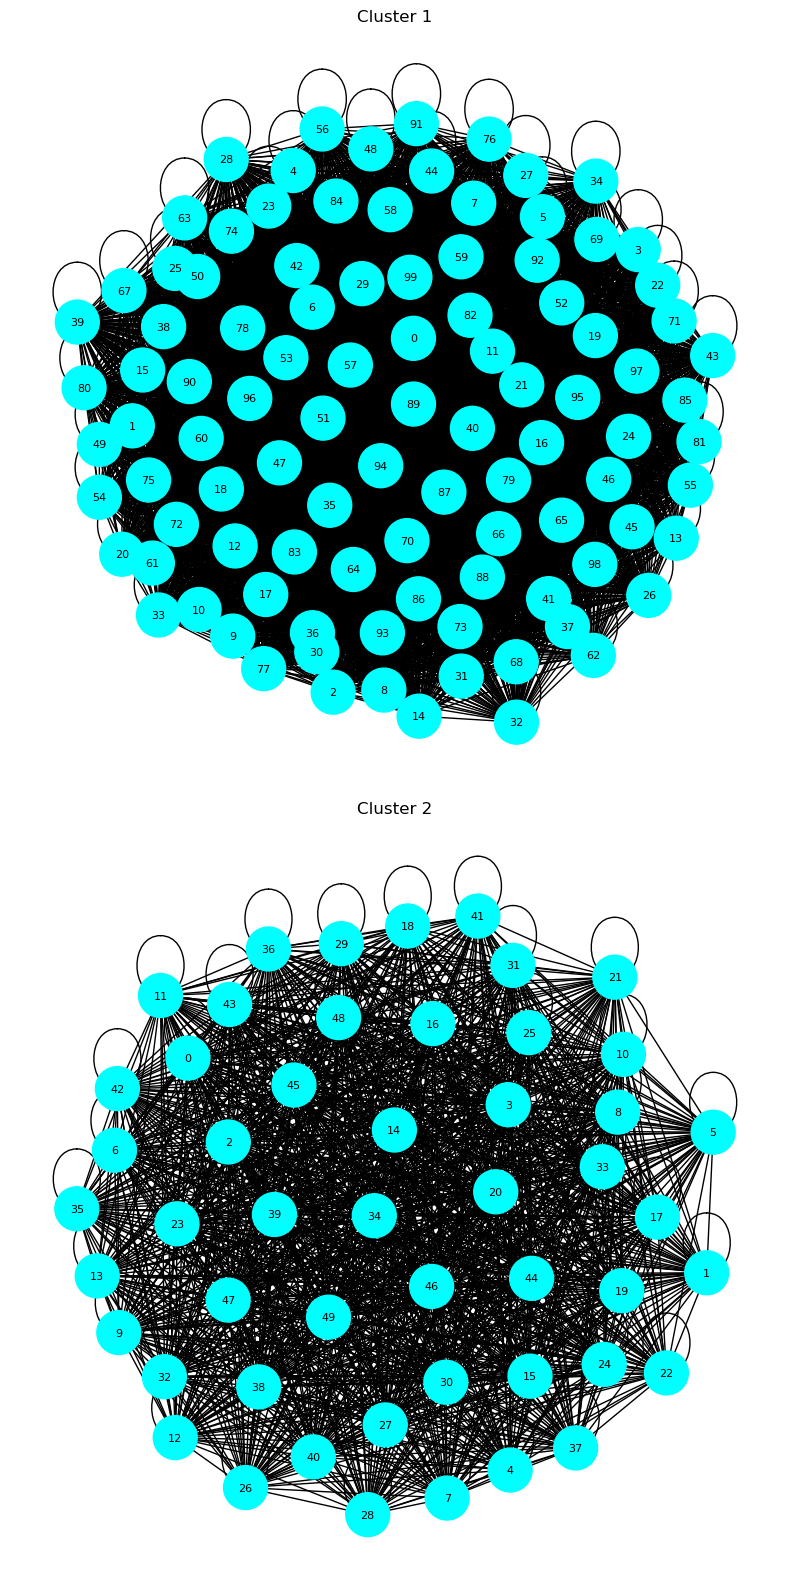

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(clusters), 1, figsize=(8, 8*len(clusters)))
for i, cluster in enumerate(clusters):
    subgraph = nx.from_numpy_array(graph[np.ix_(cluster, cluster)])
    weights = node_weights[cluster]
    
    nx.draw(subgraph, ax=axes[i], with_labels=True, node_size=1000, node_color=weights, cmap='cool', font_size=8)
    axes[i].set_title(f"Cluster {i+1}")
    
plt.tight_layout()
plt.show()